In [1]:
#!pip install wordcloud
#!pip install gensim
#!pip install pywaffle
#!pip install keras
#!pip install tensorflow

In [66]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [3]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))
#stopwords

### On fait une fonction qui crée un csv avec le texte

In [4]:
import csv
import io

In [5]:
#pour Adrien
def creation_csv(nom_livre,numero_livre):
    chemin = r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books txt\Book " + numero_livre + " - "  + nom_livre + ".txt"
    sortie = r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + numero_livre + ".csv"
    with io.open(chemin,"r",encoding="utf-8") as infile, open(sortie, 'w',encoding = 'utf-8-sig') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [7]:
#Pour Sophie
def creation_csv(nom_livre,numero_livre):
    chemin = r"C:\Users\Sophie\Harry-Python\Data\Book " + numero_livre + " - " + nom_livre + ".txt"
    sortie = r"C:\Users\Sophie\Harry-Python\Data\book" + numero_livre + ".csv"
    with io.open(chemin,"r",encoding="utf-8") as infile, open(sortie, 'w',encoding = 'utf-8-sig') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [6]:
#On crée un dictionnaire
Books = {'The Philosophers Stone': '1',
        'The Chamber of Secrets': '2',
        'The Prisoner of Azkaban': '3',
        'The Goblet of Fire':'4',
        'The Order of the Phoenix': '5',
        'The Half Blood Prince': '6',
        'The Deathly Hallows': '7'}

In [7]:
#Pour Adrien
#On fait une boucle exécutant la fonction sur chaque élément du dictionnaire
Books_csv = {}
for title, i in Books.items():
    creation_csv(title, i)
    Books_csv['book_' + i] = pd.read_csv(r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + i + ".csv",encoding = 'utf-8-sig', sep='delimiter', header=None)

<ipython-input-7-a3a912f7bcd0>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Books_csv['book_' + i] = pd.read_csv(r"C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Books CSV\Book " + i + ".csv",encoding = 'utf-8-sig', sep='delimiter', header=None)


In [ ]:
#Pour Sophie
#On fait une boucle exécutant la fonction sur chaque élément du dictionnaire
Books_csv = {}
for title, i in Books.items():
    creation_csv(title, i)
    Books_csv['book_' + i] = pd.read_csv(r"C:\Users\Sophie\Harry-Python\Data\book1.csv",encoding = 'utf-8-sig', sep='delimiter', header=None)

In [10]:
Books_csv

{'book_1':                                                        0
 0                                                      /
 1                                      THE BOY WHO LIVED
 2      Mr. and Mrs. Dursley, of number four, Privet D...
 3      were proud to say that they were perfectly nor...
 4      thank you very much. They were the last people...
 ...                                                  ...
 10139  “Oh, I will,” said Harry, and they were surpri...
 10140  the grin that was spreading over his face. “ T...
 10141   know we’re not allowed to use magic at home. I’m
 10142  going to have a lot of fun with Dudley this su...
 10143  Page | 348 Harry Potter and the Philosophers S...
 
 [10144 rows x 1 columns],
 'book_2':                                                        0
 0                                  J . K . R O W L ! N G
 1                                                  HARRY
 2                                                 POTTER
 3                     

In [11]:
Books_csv['book_1'].head(100)

0
0                                                   /
1                                   THE BOY WHO LIVED
2   Mr. and Mrs. Dursley, of number four, Privet D...
3   were proud to say that they were perfectly nor...
4   thank you very much. They were the last people...
..                                                ...
95  perfectly normal, owl-free morning. He yelled ...
96  different people. He made several important te...
97  Page | 4 Harry Potter and the Philosophers Sto...
98  calls and shouted a bit more. He was in a very...
99  mood until lunchtime, when he thought he’d str...

[100 rows x 1 columns]

In [8]:
# Créer un tableau avec tous les livres
df_books = pd.DataFrame(Books_csv.items(), columns = ['Books', 'Text'])
df_books


Books                                               Text
0  book_1                                                ...
1  book_2                                                ...
2  book_3                                                ...
3  book_4                                                ...
4  book_5                                                ...
5  book_6                                                ...
6  book_7                                                ...

In [13]:
df_books['Text'][1][0]

0                                    J . K . R O W L ! N G
1                                                    HARRY
2                                                   POTTER
3                                                        /
4                                       THE WORST BIRTHDAY
                               ...                        
11247    could’ve died, and I didn’t manage it? They’ll be
11248                                        furious. ...”
11249    And together they walked back through the gateway
11250                                 to the Muggle world.
11251    Page | 380 Harry Potter and the Chamber of Sec...
Name: 0, Length: 11252, dtype: object

In [9]:
#On veut éliminer le numéro de page hyper relou
import re
pattern = ["Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Philosophers Stone[\s]?-[\s]?J.K. Rowling",
           "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Chamber of Secrets[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Prisoner of Azkaban[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Goblet of Fire[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[l0-9]?[lOU0-9]?[lOU0-9]?[lOU0-9][\s]?Harry Potter and the Order of the Phoenix[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Half Blood Prince[\s]?-[\s]?J.K. Rowling",
          "Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Deathly Hallows[\s]?-[\s]?J.K. Rowling"]

In [10]:
def clean_page(text, pattern):
    for ele in pattern:
        liste_regex = re.findall(ele, text, re.IGNORECASE)
        for expression in liste_regex:
            text = text.replace(expression, '')
    return text

In [16]:
#Test de la fonction sur un livre
text = ''.join([text for text in Books_csv['book_1'][0]])
print(clean_page(text, pattern)[:1000])

/THE BOY WHO LIVEDMr. and Mrs. Dursley, of number four, Privet Drive,were proud to say that they were perfectly normal,thank you very much. They were the last people you’dexpect to be involved in anything strange ormysterious, because they just didn’t hold with suchnonsense.Mr. Dursley was the director of a firm calledGrunnings, which made drills. He was a big, beefyman with hardly any neck, although he did have avery large mustache. Mrs. Dursley was thin andblonde and had nearly twice the usual amount ofneck, which came in very useful as she spent somuch of her time craning over garden fences, spyingon the neighbors. The Dursley s had a small soncalled Dudley and in their opinion there was no finerboy anywhere.The Dursleys had everything they wanted, but theyalso had a secret, and their greatest fear was thatsomebody would discover it. They didn’t think theycould bear it if anyone found out about the Potters.Mrs. Potter was Mrs. Dursley’s sister, but they hadn’tmet for several years; 

In [11]:
#Création du même dictionnaire mais avec texte fusionné pour chaque tome
all_text = Books_csv.copy()
for i in Books_csv:
    all_text[i] = ' '.join([text for text in Books_csv[i][0]])

In [12]:
#Application de la fonction au dictionnaire des livres
for i in all_text:
    all_text[i] = clean_page(all_text[i], pattern)


In [19]:
#Longueur de chaque livre (avant d'enlever les numéros de pages)
#for i in all_text:
    #print('Number of words in '+i,' :', len(all_text[i]))

In [20]:
#Longueur de chaque livre (après)
for i in all_text:
    print('Number of words in '+i,' :', len(all_text[i]))

Number of words in book_1  : 436757
Number of words in book_2  : 490573
Number of words in book_3  : 623529
Number of words in book_4  : 1100456
Number of words in book_5  : 1486443
Number of words in book_6  : 980191
Number of words in book_7  : 1136459


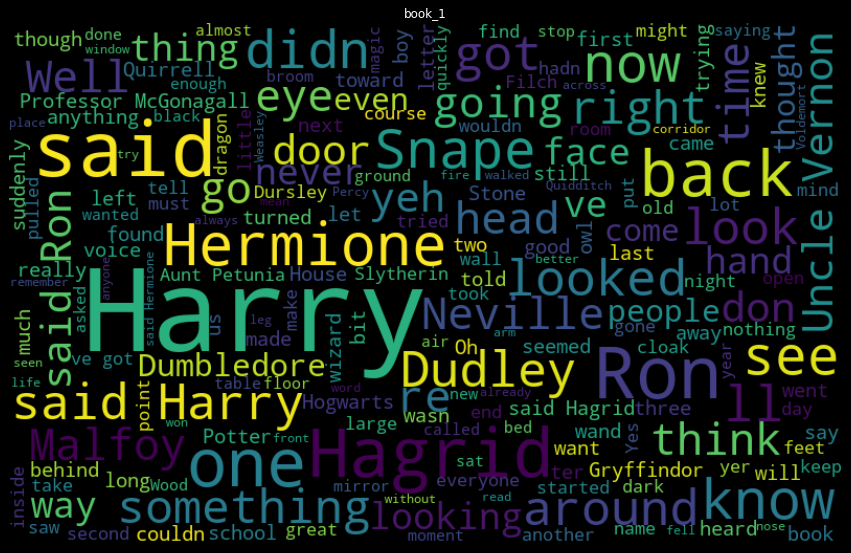

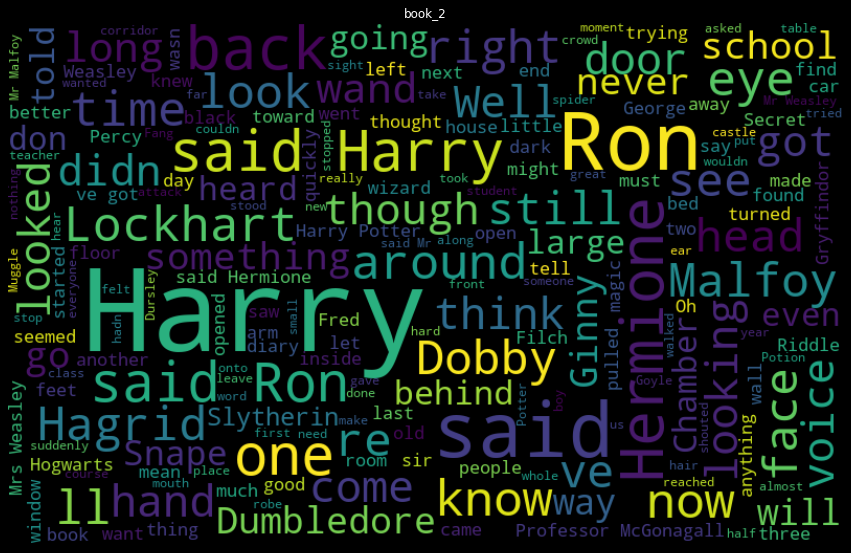

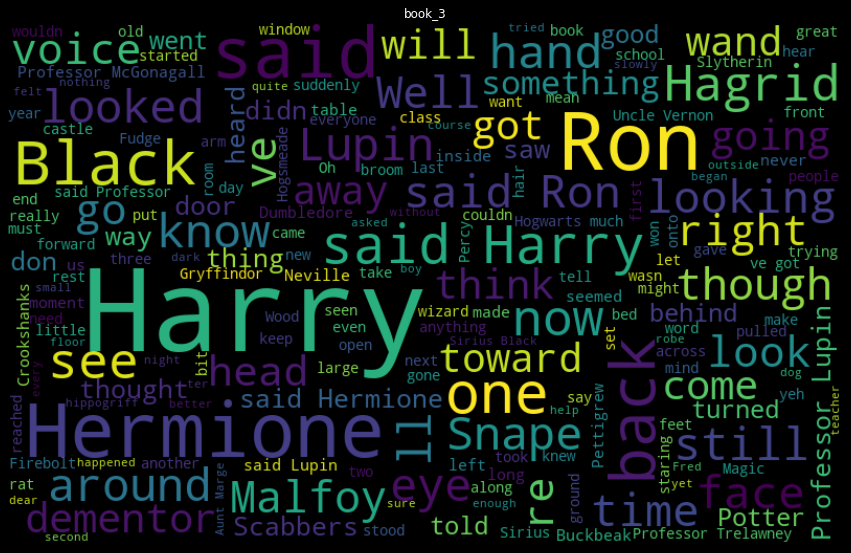

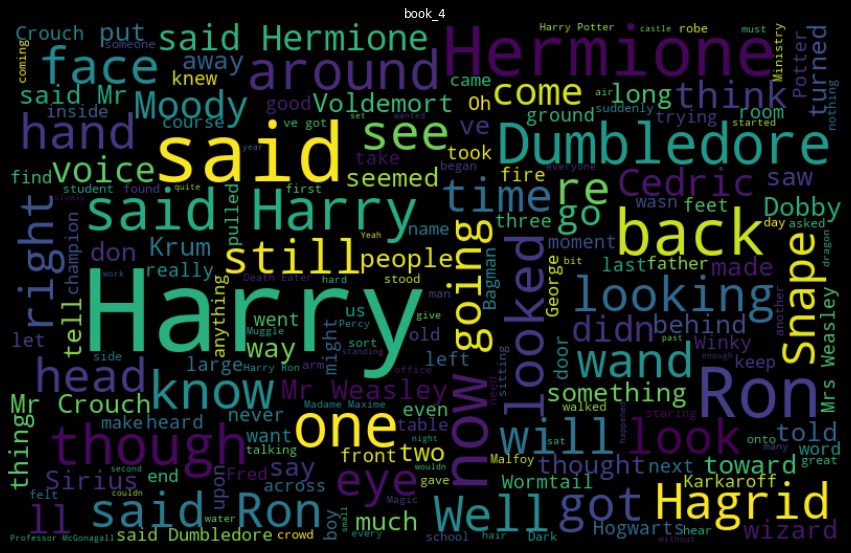

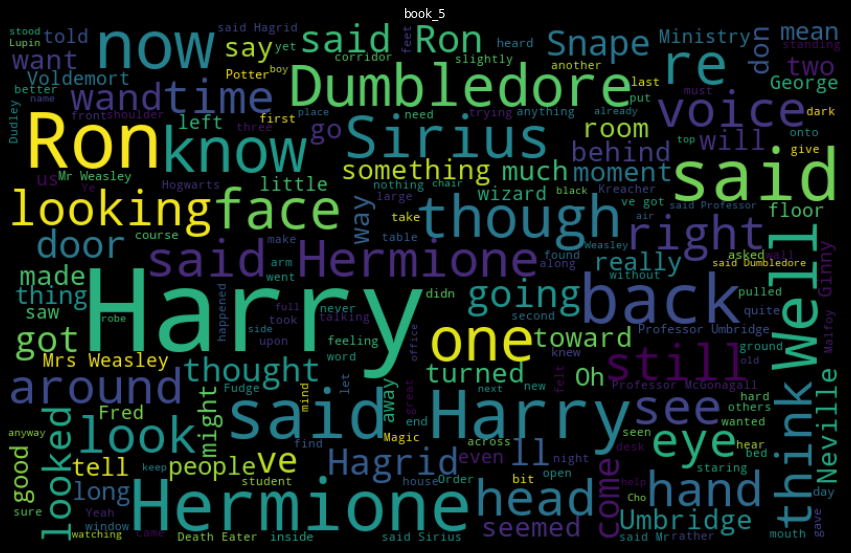

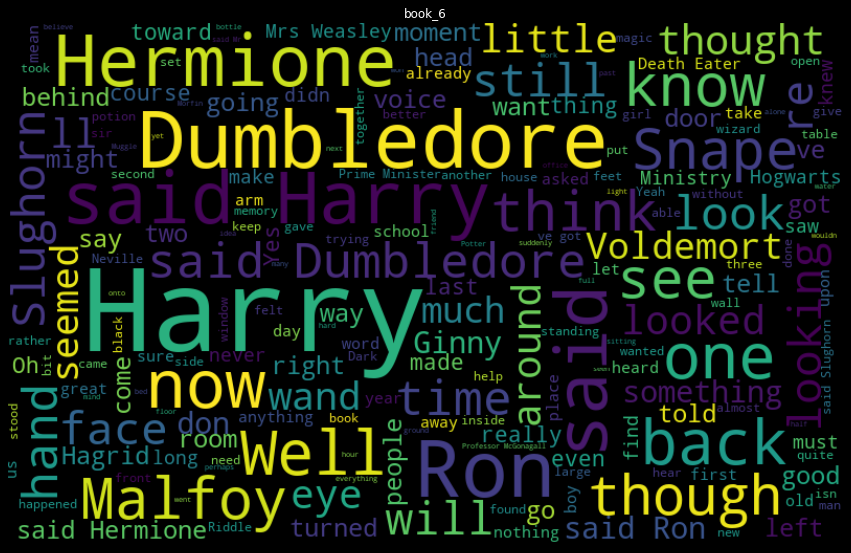

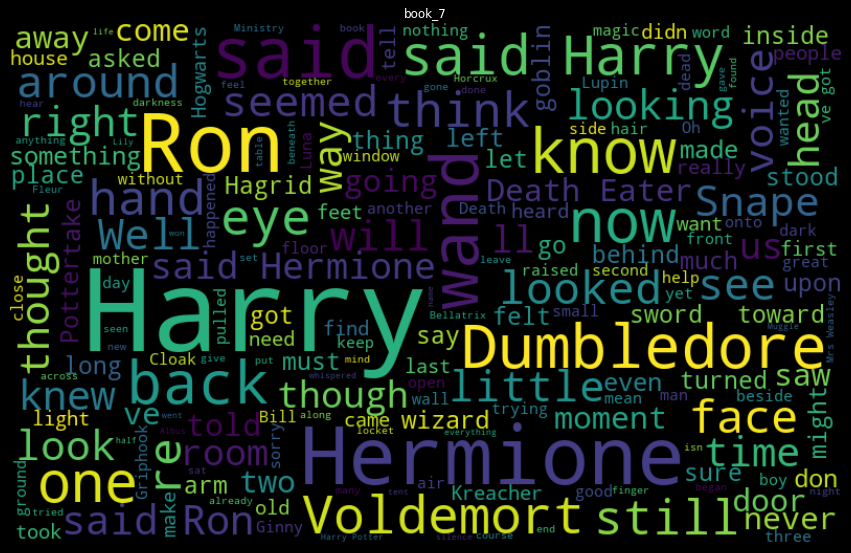

In [68]:
# Word cloud for entire training dataset
# default width=400, height=200
for i in all_text:
    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text[i])
    plt.figure(figsize=(15, 12))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');

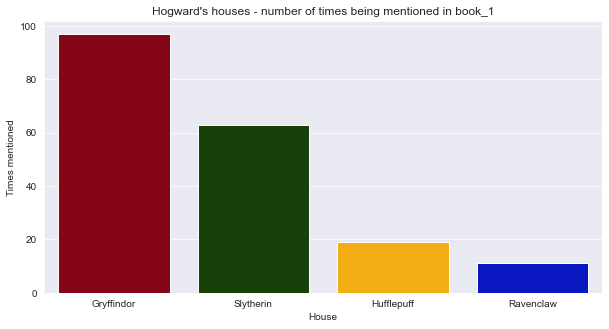

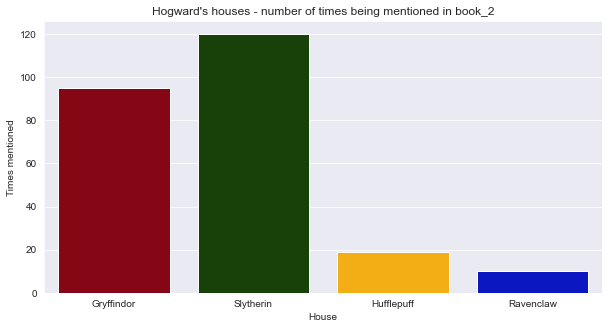

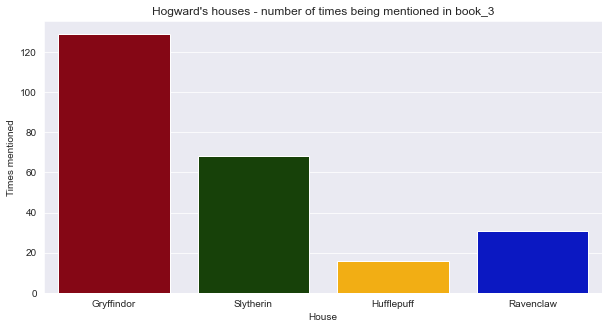

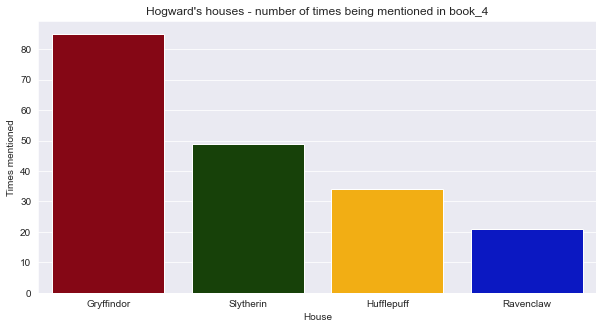

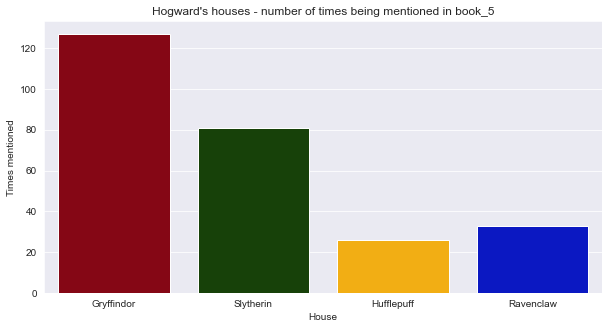

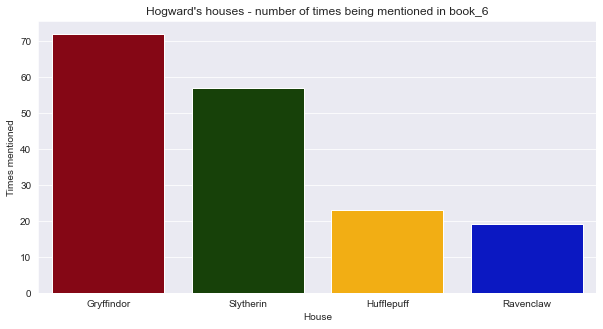

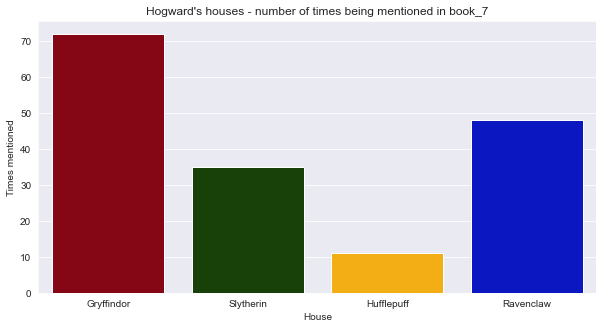

In [69]:
for i in all_text:
    Slytherin = all_text[i].count("Slytherin")
    Gryffindor = all_text[i].count("Gryffindor")
    Hufflepuff = all_text[i].count("Hufflepuff")
    Ravenclaw = all_text[i].count("Ravenclaw")
    house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
    df_house= pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
    colors = ["crimson", "forrest green", "amber", "true blue"]
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 5))
    with sns.xkcd_palette(colors):
        sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Hogward's houses - number of times being mentioned in "+i)

In [13]:
#tokenisation pour avoir un texte "clean"
#nltk.download('punkt')
all_text_clean = all_text.copy()

for i in all_text:
    
    text_list = nltk.tokenize.word_tokenize(all_text[i])
    text_list = [x.lower() for x in text_list]
    text_clean = [w.lower() for w in text_list if w not in stopwords and w.isalpha()]
    text_clean = ' '.join(text.lower() for text in text_clean)
    all_text_clean[i] = text_clean

In [22]:
all_text_clean['book_5'][:1000]

'harry potter dudley demented hottest day summer far drawing close drowsy silence lay large square houses privet drive cars usually gleaming stood dusty drives lawns emerald green lay parched yellowing use hosepipes banned due drought deprived usual pursuits inhabitants privet drive retreated shade cool houses windows thrown wide hope tempting nonexistent breeze person left outdoors teenage boy lying flat back flower bed outside number four skinny bespectacled boy pinched slightly unhealthy look someone grown lot short space time jeans torn dirty baggy faded soles trainers peeling away uppers harry potter appearance endear neighbors sort people thought scruffiness ought punishable law hidden behind large hydrangea bush evening quite invisible passersby fact way would spotted uncle vernon aunt petunia stuck heads living room window looked straight flower bed whole harry thought congratulated idea hiding perhaps comfortable lying hot hard earth hand nobody glaring grinding teeth loudly c

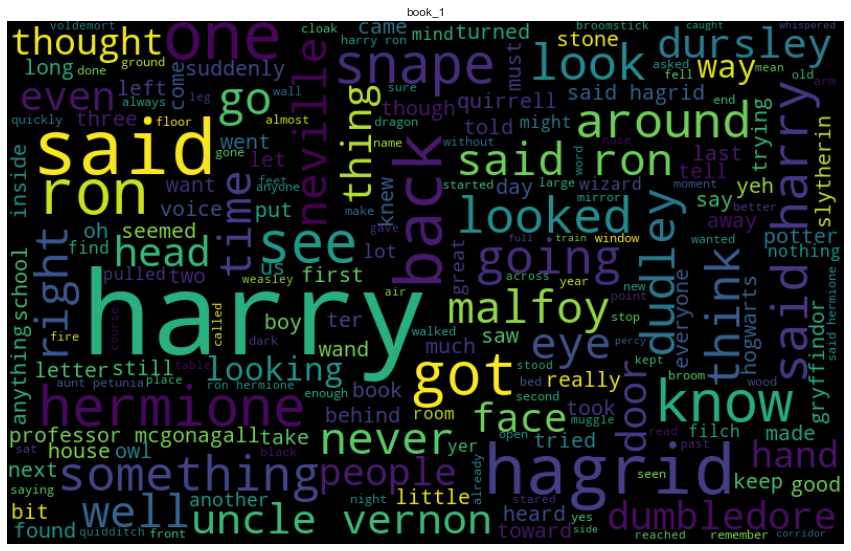

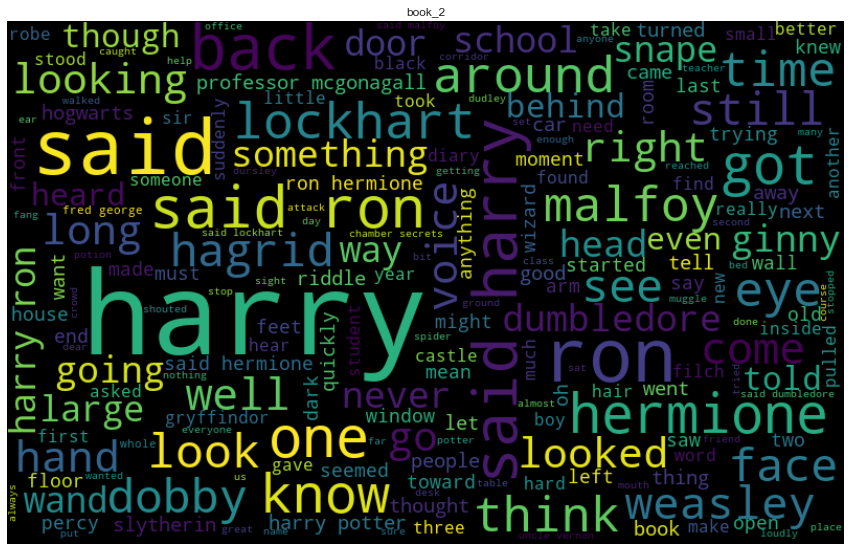

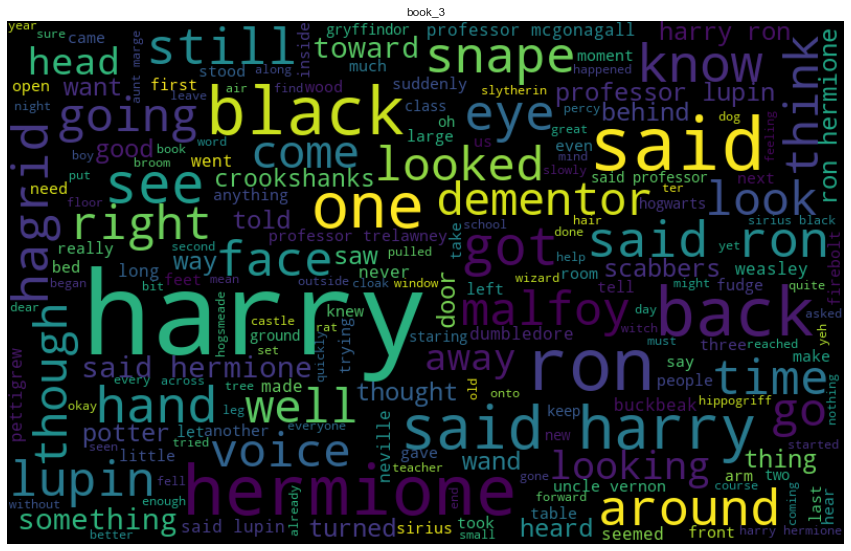

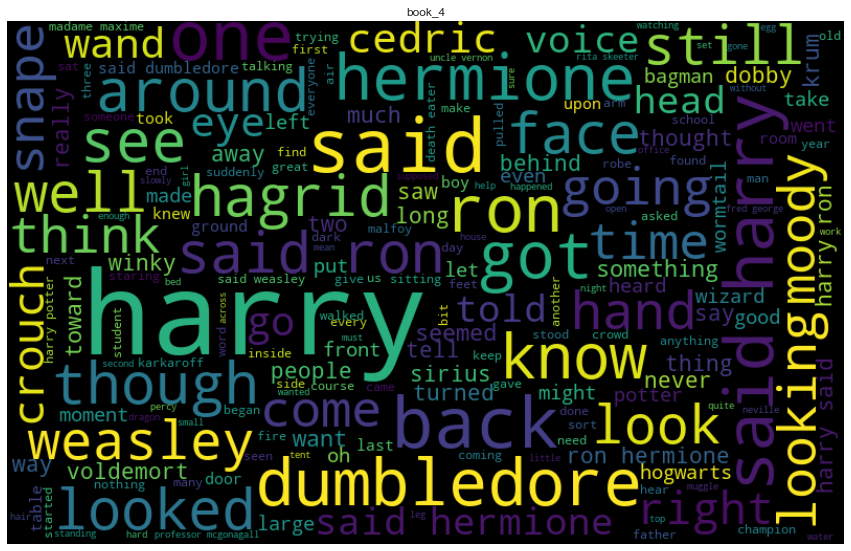

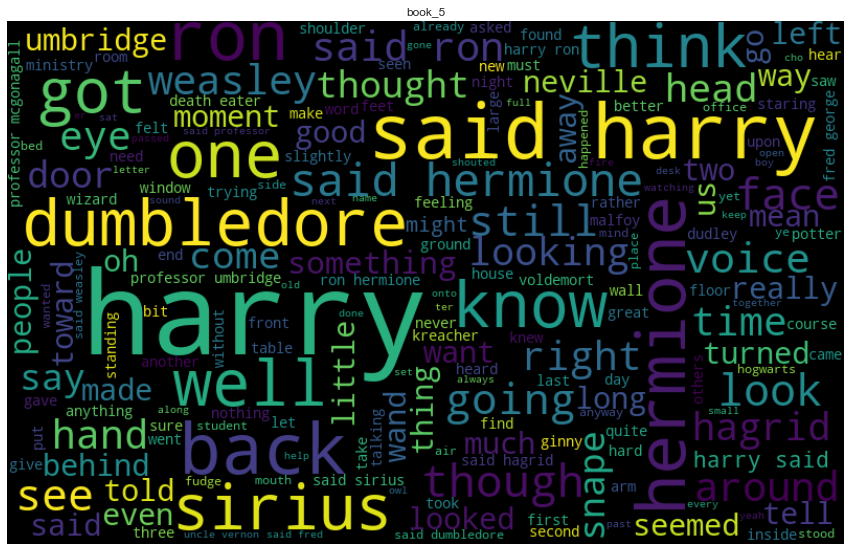

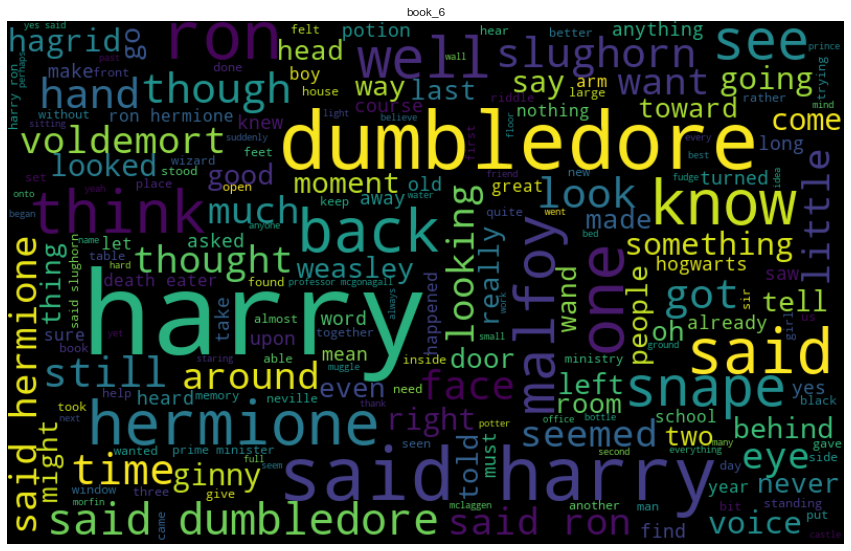

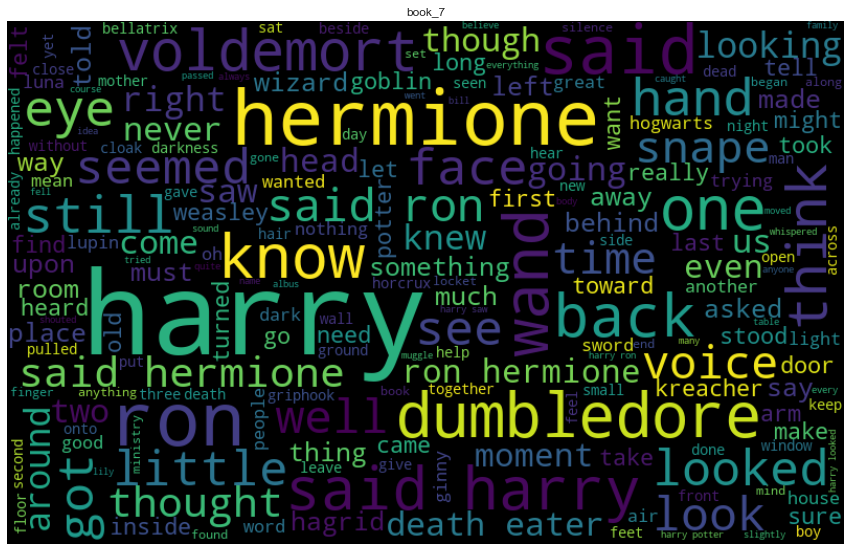

In [72]:
for i in all_text_clean:
    wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text_clean[i])
    plt.figure(figsize=(15, 12))
    plt.title(i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');

In [14]:
def most_common_word(text_clean):
    text_clean_list = text_clean.split()
    text_counts = Counter(text_clean_list)
    text_common_words = [word[0] for word in text_counts.most_common(25)]
    text_common_counts = [word[1] for word in text_counts.most_common(25)]

    return text_common_words, text_common_counts

In [15]:
#Création d'un dictionnaire avec les mots les plus utilisés par tome
hp_most_common = {}
for i in all_text_clean:
    hp_most_common[i] = most_common_word(all_text_clean[i])

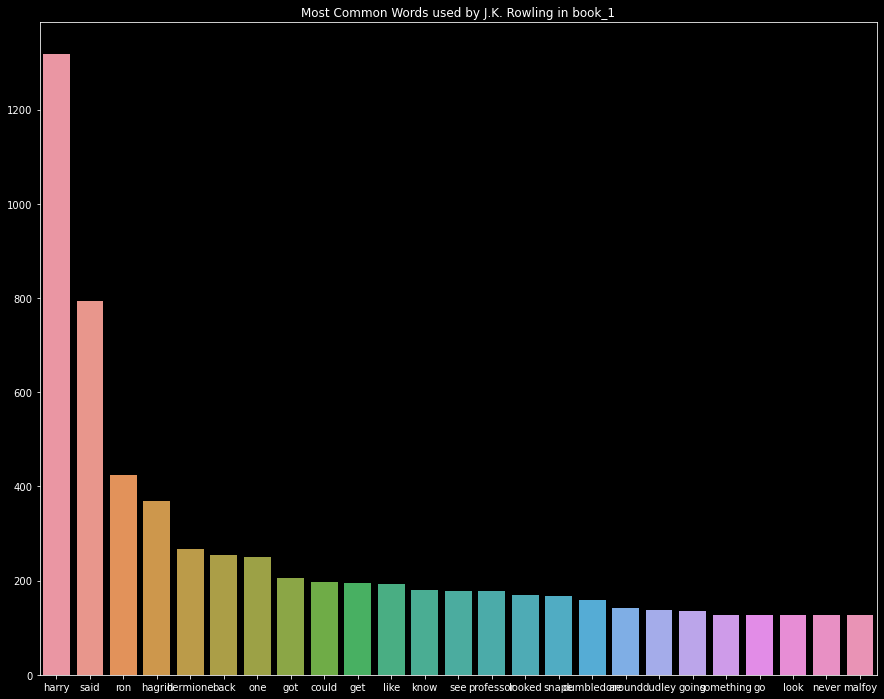

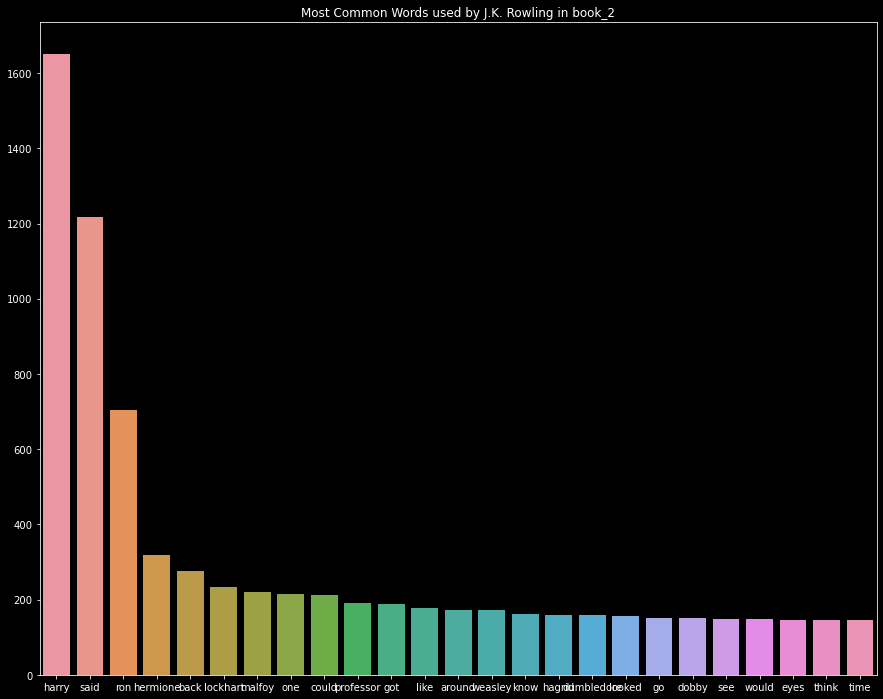

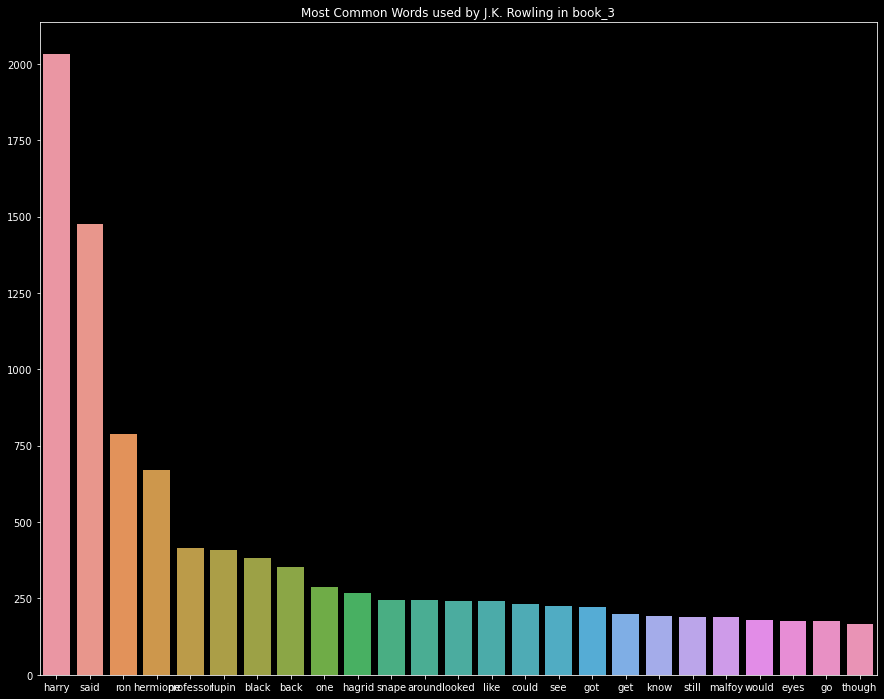

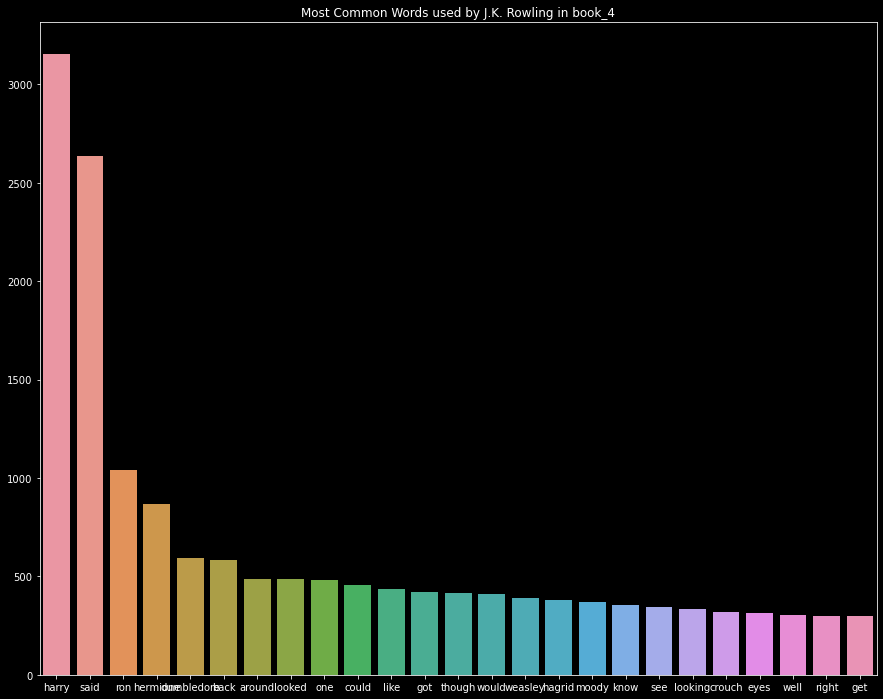

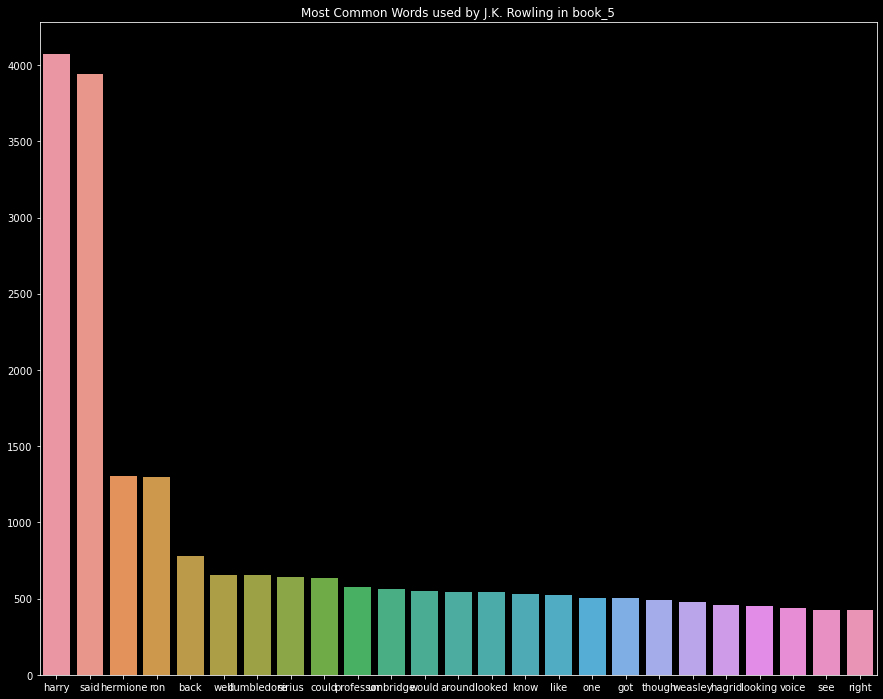

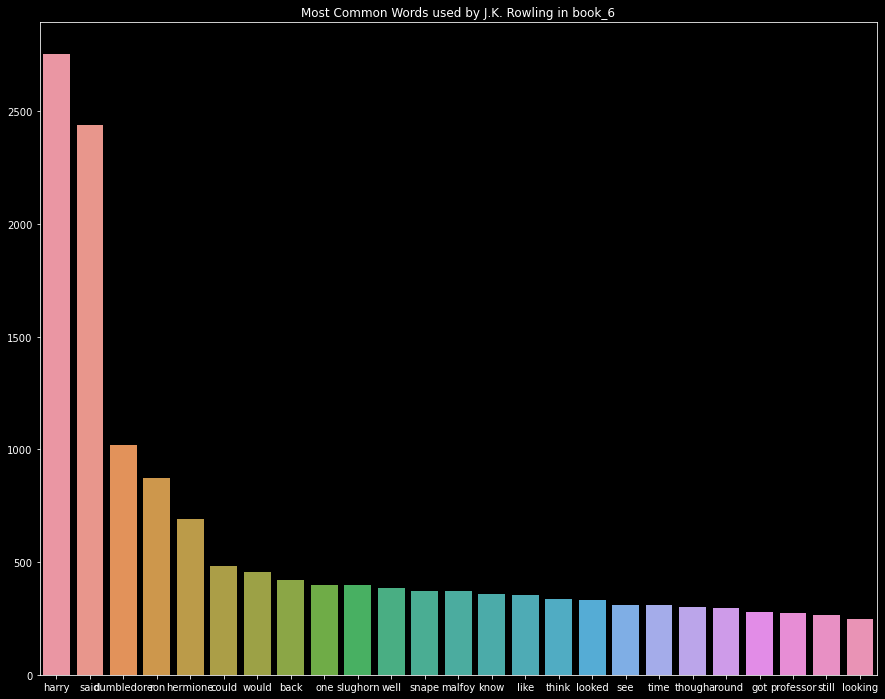

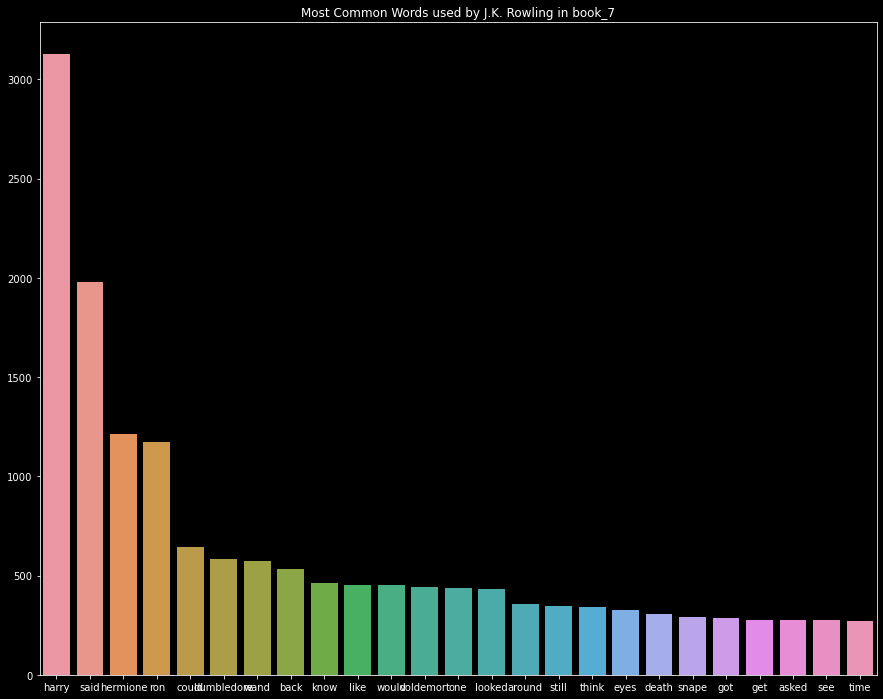

In [16]:
#Graphique
for i in hp_most_common:
        plt.style.use('dark_background')
        plt.figure(figsize=(15, 12))
        words = hp_most_common[i][0]
        count = hp_most_common[i][1]
        sns.barplot(x = words, y = count)
        plt.title('Most Common Words used by J.K. Rowling in ' +i)

In [ ]:
#def supp_chap(text):
    #pattern = (
           #    "([A-Z]+)\\b(?!([A-Z]+(?=\.))\\b)"+"(?![a-z']|[A-Z.])")
               # Selects the chapter title but excludes all
               # caps word beginning first sentence of the chapter
               # chapter title ends before lowercase letters or a period
                
 #   tous_chaps = re.findall(pattern, text)
  #  print(tous_chaps)
   # i = 1
   # for chaps in tous_chaps:
    #    text = text.replace(str(chaps),str(i))
     #   i = i+1
            #print(expression)
   # print(text)

In [ ]:
#supp_chap(all_text['book2'])

In [17]:
#nltk.download('averaged_perceptron_tagger')
from collections import Counter

In [18]:
def noms_test (text):
    import re
    pattern = 
    "?![A-Z]Page[\s]?\|[\s]?[0-9]?[0-9]?[0-9][\s]?Harry Potter and the Philosophers Stone[\s]?-[\s]?J.K. Rowling"

SyntaxError: invalid syntax (<ipython-input-18-5d102c665354>, line 3)

In [19]:
def noms_propres(text):
    #on met le texte tokenized
    text = nltk.word_tokenize(text)
    text = nltk.pos_tag(text)
    
    nnp = []
    
    for element in text:
        
        if element[0] in ["You-Know-Who","Know-Who","Lord"]:
                element = ("Voldemort",element[1])
            
        if element[0] == "Severus":
                element = ("Snape",element[1])
                
        if element[0] == "Albus":
                element = ("Dumbledore",element[1])
            
        if element[0] == "Granger":
                element = ("Hermione",element[1])
                
        if element[0] == "Potter":
                element = ("Harry",element[1])
        
        if element[0] == "Draco":
                element = ("Malfoy",element[1])
        
        if element[0] == "Aunt":
                element = ("Petunia",element[1])
        
        if element[0] == "Uncle":
                element = ("Vernon",element[1])
                
        if element[0] in ["Slytherin","Gryffindor","Ravenclaw","Hufflepuff","Hogwarts"]:
                element = (" ",element[1])
        
        if element[1] == "NNP" and len(element[0]) > 2 :
            
            nnp.append(element[0])
            
            
    nnp = Counter(nnp).most_common(14)
    #on regarde que les 14 premiers (après c'est pas toujours des noms propres et de toute façon on va pas étudier tout)
    
    print (nnp)

In [20]:
x = noms_propres(all_text["book_1"])
#je sais pas quoi faire de professor: on peut le faire sauter parce qu'il est sûrement souvent suivi de

[('Harry', 1407), ('Ron', 424), ('Hagrid', 369), ('Hermione', 281), ('Vernon', 225), ('Professor', 177), ('Snape', 166), ('Dumbledore', 158), ('Dudley', 136), ('Malfoy', 135), ('Neville', 116), ('Quirrell', 112), ('Petunia', 109), ('McGonagall', 99)]


In [35]:
#Travail sur la relation entre personnages
all_text_clean_list = all_text_clean.copy()
for i in all_text_clean:
    all_text_clean_list[i] = all_text_clean[i].split()


harry = ['harry', 'harry potter']
ron = ['ron', 'ron weasley']
hermione = ['hermione granger','hermione']
ginny = ['ginny weasley', 'ginny']
dumbledore = ['albus dumbledore', 'dumbledore']
sirius = ['sirius black', 'sirius']
snape = ['severus snape', 'snape']
luna = ['luna lovegood', 'luna']
hagrid = ['rubeus hagrid', 'hagrid']
dobby = ['dobby']
voldemort = ['tom riddle', 'voldemort', 'you-know-who', 'know-who', 'lord']

[['harry', 'harry potter'],
 ['ron', 'ron weasley'],
 ['hermione granger', 'hermione'],
 ['ginny weasley', 'ginny'],
 ['albus dumbledore', 'dumbledore'],
 ['sirius black', 'sirius'],
 ['severus snape', 'snape'],
 ['luna lovegood', 'luna'],
 ['rubeus hagrid', 'hagrid'],
 ['dobby'],
 ['tom riddle', 'voldemort', 'you-know-who', 'know-who', 'lord']]

In [33]:
#Fonction récupérant l'index de chaque apparition d'un personnage
def occurence(text_list, perso):
    occurence_all = []
    for i in text_list:
        occurence = []
        for idx, word in enumerate(text_list[i]):
            if word in perso:
                occurence.append(idx)
        occurence_all.append(occurence)
    return occurence_all

In [37]:
harry_occ = occurence(all_text_clean_list, harry)
ron_occ = occurence(all_text_clean_list, ron)
hermione_occ = occurence(all_text_clean_list, hermione)
ginny_occ = occurence(all_text_clean_list, ginny)
dumbledore_occ = occurence(all_text_clean_list, dumbledore)
sirius_occ = occurence(all_text_clean_list, sirius)
snape_occ = occurence(all_text_clean_list, snape)
luna_occ = occurence(all_text_clean_list, luna)
hagrid_occ = occurence(all_text_clean_list, hagrid)
dobby_occ = occurence(all_text_clean_list, dobby)
voldemort_occ = occurence(all_text_clean_list, voldemort)

In [23]:
#Application de la fonction à Harry et Ron
print(len(harry_occ))
print(len(ron_occ))

1319
425


In [56]:
#Fonction calculant un score de proximité entre deux personnages
def relation(perso_pdv, perso_cible):   #les arguments sont les listes d'index trouvées précédemment
    score_all = []
    for i in range(0,7): #on boucle sur tous les livres
        liens = 0   #compteur de liens
        list_index = []
        for idx in perso_pdv[i]:
            #on considère que deux personnages ont une interaction s'ils sont à moins de 40 mots d'écart
            idx_bas = idx - 40
            idx_haut = idx + 40
        
            for index in perso_cible[i]: 
                if (idx_bas <= index <= idx_haut):
                    liens += 1                     #si les index sont proches, on incrémante le compteur de liens
                    list_index.append([idx, index])
        max_lien = float(len(perso_pdv[i]))  #on calcule le nombre de liens potentiels max 
                                      #(= le nombre d'apparition du personnage)
        liens_uniques = []
        for ele in list_index:
            if ele[0] not in liens_uniques:
                liens_uniques.append(ele[0])    
        score = ((len(liens_uniques) / max_lien)*100) #on fait le ratio entre le nombre de lien et le nombre de liens max
        score_all.append(score) #on stocke le score de chaque livre
    return score_all

In [62]:
#On applique la fonction au trio principal
harry2ron = relation(harry_occ, ron_occ)
ron2harry = relation(ron_occ, harry_occ)
harry2hermione = relation(harry_occ, hermione_occ)
hermione2harry = relation(hermione_occ, harry_occ)
ron2hermione = relation(ron_occ, hermione_occ)
hermione2ron = relation(hermione_occ, ron_occ)

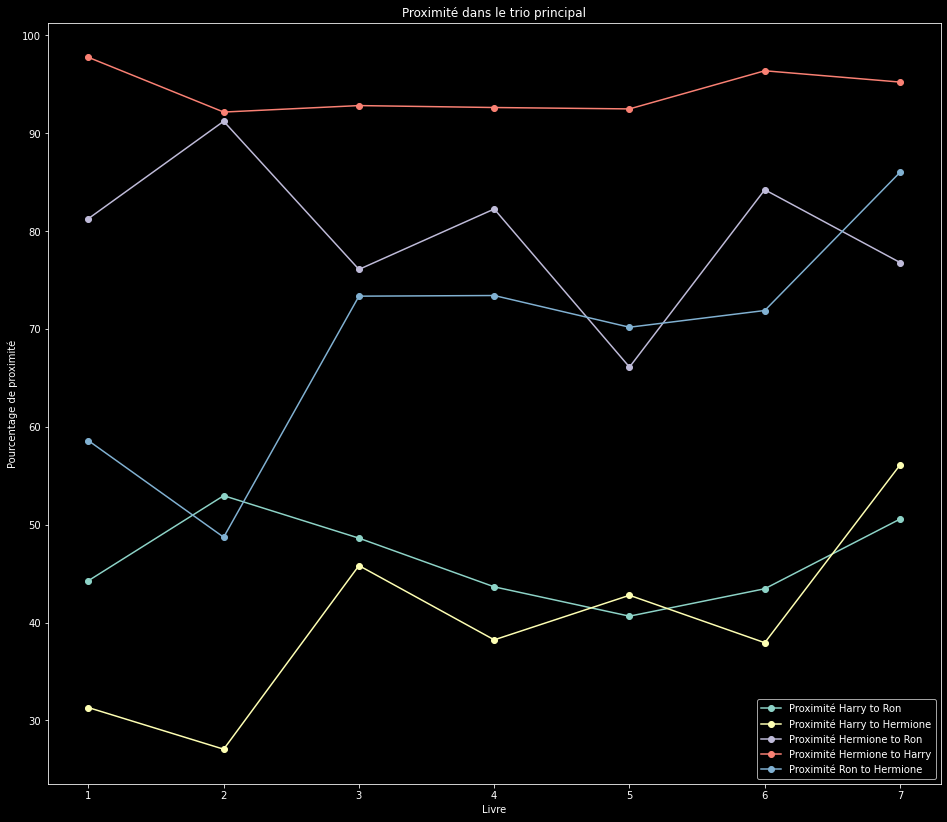

In [79]:
#Graphique
x = np.linspace(1,7,7)
plt.figure(figsize=(16,14))
plt.plot(x, harry2ron, marker = 'o', label = 'Proximité Harry to Ron')
plt.plot(x, harry2hermione, marker = 'o', label = 'Proximité Harry to Hermione')
plt.plot(x, hermione2ron, marker = 'o', label = 'Proximité Hermione to Ron')
plt.plot(x, hermione2harry, marker = 'o', label = 'Proximité Hermione to Harry')
plt.plot(x, ron2hermione, marker = 'o', label = 'Proximité Ron to Hermione')
plt.legend(loc = 'best', prop = {'size': 10})
plt.title('Proximité dans le trio principal')
plt.xlabel('Livre')
plt.ylabel('Pourcentage de proximité')
plt.show()